In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
ratings = pd.read_csv('ratings_Beauty.csv')

In [3]:
ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [4]:
ratings.shape

(2023070, 4)

In [5]:
## Product popularity based system targeted at new customers

In [6]:
popular_items = pd.DataFrame(ratings.groupby('ProductId')['Rating'].count())

In [7]:
popular_items.head()

,Rating
ProductId,
0205616461,1
0558925278,2
0733001998,1
0737104473,1
0762451459,1


In [8]:
most_popular = popular_items.sort_values('Rating', ascending = False)

In [9]:
most_popular.head()

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088


<AxesSubplot:xlabel='ProductId'>

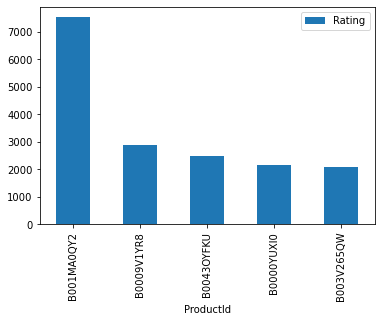

In [10]:
most_popular.head().plot(kind= 'bar')

In [11]:
## Collaborative filtering system based on customers purchase history & ratings provided by other users who brought the similar items

In [12]:
rating1 = ratings.head(10000)

In [13]:
utility_matrix = rating1.pivot_table(values = 'Rating', index = 'UserId', columns = 'ProductId', fill_value = 0)

In [14]:
utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
utility_matrix.shape

(9697, 886)

In [16]:
A = utility_matrix.T

In [17]:
A.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
A.shape

(886, 9697)

In [19]:
A1 = A

In [20]:
SVD = TruncatedSVD(n_components = 10)
decomposed_matrix = SVD.fit_transform(A)

In [21]:
decomposed_matrix.shape

(886, 10)

In [22]:
correaltion_matrix = np.corrcoef(decomposed_matrix)
correaltion_matrix.shape

(886, 886)

In [23]:
A.index[88]

'5357956227'

In [24]:
i = "5357956227"

In [25]:
item_name = list(A.index)
item_ID = item_name.index(i)
item_ID

88

In [26]:
correlation_item_ID = correaltion_matrix[item_ID]
correlation_item_ID.shape

(886,)

In [27]:
Recommend = list(A.index[correlation_item_ID>0.907])

In [28]:
Recommend[0:9]

['5357955972',
 '5357956227',
 '7883527428',
 '8329000710',
 '832900094X',
 '8934903716',
 '9509369934',
 '9746427962',
 '9788073417']